In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import tensorflow as tf

In [2]:
key = "ab5aad5e6e9d08596cd23873b2a238e8757dd003"
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('AAPL.csv')
df=pd.read_csv('AAPL.csv')

In [3]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-02-22 00:00:00+00:00,96.88,96.9000,95.92,96.31,34280758,22.523315,22.527965,22.300128,22.390798,137123032,0.0,1.0
1,AAPL,2016-02-23 00:00:00+00:00,94.69,96.5000,94.55,96.40,31942633,22.014169,22.434970,21.981621,22.411721,127770532,0.0,1.0
2,AAPL,2016-02-24 00:00:00+00:00,96.10,96.3800,93.32,93.98,36255745,22.341975,22.407072,21.695662,21.849103,145022980,0.0,1.0
3,AAPL,2016-02-25 00:00:00+00:00,96.76,96.7600,95.25,96.05,27582659,22.495417,22.495417,22.144362,22.330351,110330636,0.0,1.0
4,AAPL,2016-02-26 00:00:00+00:00,96.91,98.0237,96.58,97.20,28991131,22.530290,22.789210,22.453569,22.597711,115964524,0.0,1.0


In [4]:
df.columns

Index(['symbol', 'date', 'close', 'high', 'low', 'open', 'volume', 'adjClose',
       'adjHigh', 'adjLow', 'adjOpen', 'adjVolume', 'divCash', 'splitFactor'],
      dtype='object')

In [5]:
tiingo_extraced_data=df.reset_index()[['date','close']]

In [6]:
tiingo_extraced_data

,date,close
0,2016-02-22 00:00:00+00:00,96.88
1,2016-02-23 00:00:00+00:00,94.69
2,2016-02-24 00:00:00+00:00,96.10
3,2016-02-25 00:00:00+00:00,96.76
4,2016-02-26 00:00:00+00:00,96.91
...,...,...
1253,2021-02-11 00:00:00+00:00,135.13
1254,2021-02-12 00:00:00+00:00,135.37
1255,2021-02-16 00:00:00+00:00,133.19
1256,2021-02-17 00:00:00+00:00,130.84


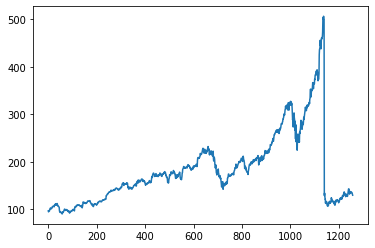

In [7]:
plt.plot(tiingo_extraced_data.iloc[:,1])

LSTMs are sensitive to scaling so lets first scale it

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
tiingo_extraced_data=scaler.fit_transform(np.array(tiingo_extraced_data.iloc[:,1]).reshape(-1,1))
tiingo_extraced_data

array([[0.01573061],
       [0.01046302],
       [0.01385448],
       ...,
       [0.10306675],
       [0.09741431],
       [0.09469633]])

In [9]:
##splitting dataset into train and test split
training_size=int(len(tiingo_extraced_data)*0.65)
test_size=len(tiingo_extraced_data)-training_size
train_data,test_data=tiingo_extraced_data[0:training_size,:],tiingo_extraced_data[training_size:len(tiingo_extraced_data),:1]

In [10]:
training_size,test_size

(817, 441)

In [11]:
train_data

array([[0.01573061],
       [0.01046302],
       [0.01385448],
       [0.01544197],
       [0.01580277],
       [0.0152736 ],
       [0.02450992],
       [0.02503909],
       [0.02684305],
       [0.03047505],
       [0.02773301],
       [0.02571257],
       [0.02592904],
       [0.02604931],
       [0.02867108],
       [0.02929645],
       [0.03425135],
       [0.03759471],
       [0.03718581],
       [0.03747444],
       [0.03745039],
       [0.03939868],
       [0.03797956],
       [0.03687312],
       [0.03571858],
       [0.04170776],
       [0.04622971],
       [0.04485869],
       [0.04726398],
       [0.04998196],
       [0.04683103],
       [0.04959711],
       [0.04377631],
       [0.04406494],
       [0.04493085],
       [0.04834636],
       [0.05219483],
       [0.05233915],
       [0.04692724],
       [0.0412267 ],
       [0.03985568],
       [0.04038485],
       [0.03759471],
       [0.03689717],
       [0.035454  ],
       [0.03369814],
       [0.01799158],
       [0.010

In [16]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [18]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [19]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [21]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [22]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [23]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Train on 716 samples, validate on 340 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
716/716 [==============================] - 7s 10ms/sample - loss: 0.0128 - val_loss: 0.0356
Epoch 2/100
716/716 [==============================] - 3s 4ms/sample - loss: 0.0024 - val_loss: 0.0235
Epoch 3/100
716/716 [==============================] - 3s 4ms/sample - loss: 0.0012 - val_loss: 0.0212
Epoch 4/100
716/716 [==============================] - 3s 4ms/sample - loss: 4.5844e-04 - val_loss: 0.0182
Epoch 5/100
716/716 [==============================] - 4s 5ms/sample - loss: 3.6245e-04 - val_loss: 0.0175
Epoch 6/100
716/716 [==============================] - 4s 6ms/sample - loss: 3.1669e-04 - val_loss: 0.0171
Epoch 7/100
716/716 [==============================] - 7s 9ms/sample - loss: 3.0328e-04 - val_loss: 0.0171
Epoch 8/100
716/716 [==============================] - 7s 10ms/sample - loss: 3.2341e-04 - val_loss: 0.0165
Epoch 9/100
71

In [26]:
tf.__version__

'1.14.0'

In [27]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [28]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [29]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

160.6537385015791

In [30]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

245.81958685882316

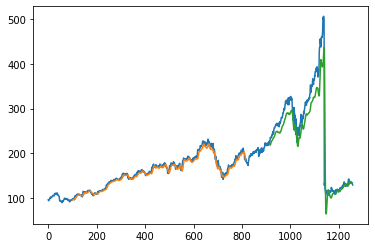

In [35]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(tiingo_extraced_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(tiingo_extraced_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(tiingo_extraced_data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(tiingo_extraced_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [36]:
len(test_data)

441

In [37]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [38]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [39]:
temp_input

[0.05277209861695731,
 0.05921828021647624,
 0.05712567648827421,
 0.06126277811184605,
 0.06361996392062536,
 0.05455201443174984,
 0.062922429344558,
 0.05488875526157544,
 0.059506915213469624,
 0.059242333132892344,
 0.06405291641611544,
 0.08192423331328924,
 0.07398677089597111,
 0.07420324714371618,
 0.07304870715574258,
 0.06898376428141911,
 0.061671677690920024,
 0.06535177390258567,
 0.06381238725195432,
 0.06111846061334936,
 0.059410703547805144,
 0.05943475646422125,
 0.06316295850871917,
 0.05017438364401683,
 0.06008418520745634,
 0.04454600120264579,
 0.04432952495490078,
 0.04834636199639203,
 0.05919422730006013,
 0.06900781719783522,
 0.06819001803968727,
 0.062489476849067915,
 0.06164762477450386,
 0.0701142513529765,
 0.0694407696933253,
 0.06956103427540589,
 0.07206253758268188,
 0.06987372218881538,
 0.0666025255562237,
 0.06806975345760674,
 0.0649428743235117,
 0.056548406494287384,
 0.05972339146121464,
 0.06179194227300061,
 0.06313890559230306,
 0.0690559

In [40]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

6905592 0.07788334 0.07874925 0.07841251
 0.07675286 0.08036079 0.08187613 0.07562237 0.0791341  0.0771377
 0.07562237 0.09029465 0.09012628 0.09226699 0.08734817 0.0911365
 0.09991581 0.09770295 0.10013229 0.11148527 0.10710764 0.10434155
 0.1018641  0.09397474 0.09782321 0.08721587 0.09760673 0.10032471
 0.09294047 0.09250752 0.09753458 0.0927721  0.08851473 0.09017438
 0.10027661 0.11191822 0.11720986 0.12647023 0.1270475  0.12440168
 0.11244738 0.10010824 0.10535177 0.10739627 0.10487072 0.11316897
 0.11165364 0.11201443 0.10984967 0.10835839 0.10773301 0.10831028
 0.10306675 0.09741431 0.09469633 0.10147445 0.0996168  0.09815052
 0.0970497  0.09620513 0.09551333 0.09490247 0.09433076 0.09377694
 0.0932311  0.09268872 0.09214734 0.09160534]
13 day output [[0.09106137]]
14 day input [0.07304871 0.06898376 0.06167168 0.06535177 0.06381239 0.06111846
 0.0594107  0.05943476 0.06316296 0.05017438 0.06008419 0.044546
 0.04432952 0.04834636 0.05919423 0.06900782 0.06819002 0.06248948
 0.0

In [41]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [42]:
len(tiingo_extraced_data)

1258

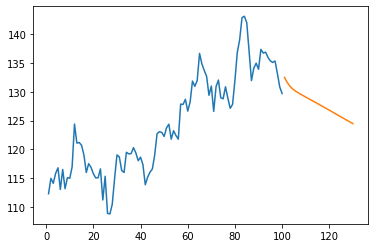

In [43]:
plt.plot(day_new,scaler.inverse_transform(tiingo_extraced_data[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

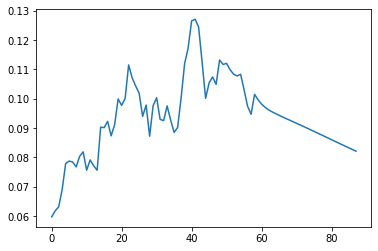

In [44]:
df3=tiingo_extraced_data.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [45]:
df3=scaler.inverse_transform(df3).tolist()

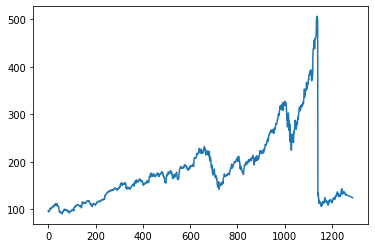

In [46]:
plt.plot(df3)